In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [2]:
# Load the data from CSV files
train_data = pd.read_csv("train.csv")
stores_data = pd.read_csv("stores.csv")
oil_data = pd.read_csv("oil.csv")
holidays_data = pd.read_csv("holidays_events.csv")
test_data = pd.read_csv("test.csv")



In [3]:


# Step 8: Fit ARIMA Model
# Adjust the order parameter (p, d, q) based on your data
order = (5, 1, 0)  # Example values, you may need to tune these
arima_model = ARIMA(train_data['sales'], order=order)
arima_fit = arima_model.fit()







In [4]:
# Step 9: Make Predictions
predictions = arima_fit.forecast(steps=len(test_data))  
# Forecast the same number of steps as the test data

In [6]:
# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'id': test_data['id'],
    'sales': predictions
})

# Save the DataFrame to a CSV file
submission_df.to_csv('sampe_submission.csv', index=False)


In [7]:



# Step 10: Evaluate Model
mae = mean_absolute_error(test_data['sales'], predictions)
mse = mean_squared_error(test_data['sales'], predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


KeyError: 'sales'

KeyError: 'sales'

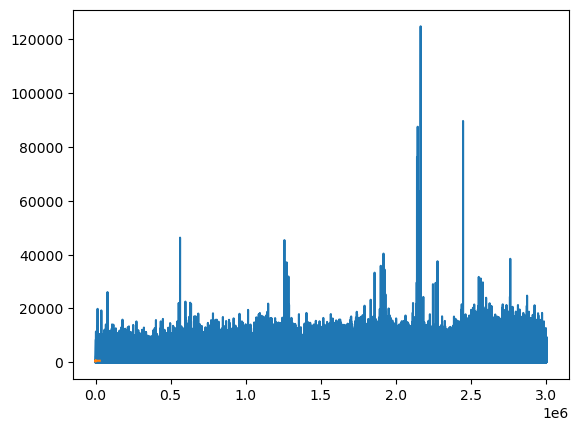

In [8]:
# Step 11: Visualize Results
plt.plot(train_data['sales'], label='Train')
plt.plot(test_data.index, predictions, label='Test Predictions')
plt.plot(test_data.index, test_data['sales'], label='Actual Test')
plt.legend()
plt.show()